In [1]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

from features import *
from metrics import *

In [2]:
csv_df = pd.read_csv("Melbourne_housing_FULL.csv")

In [3]:
X, y = preprocess_ver_1(csv_df)

In [4]:
X.shape, y.shape

((8887, 20), (8887,))

In [5]:
rf.fit(X, y)

/Users/patrick/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [6]:
RANDOM_STATE = 10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,shuffle=True,random_state=RANDOM_STATE)

In [7]:
X.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8887, 20), (6665, 20), (2222, 20), (6665,), (2222,))

In [8]:
rf = RandomForestRegressor(n_estimators=100, random_state=17)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=17, verbose=0, warm_start=False)

In [9]:
rf.score(X_train, y_train)

0.9729223324432912

In [10]:
rf.score(X_test, y_test)

0.8404539682945541

In [11]:
rf.predict(X_test)

array([1050135.  , 1180243.47, 2489224.4 , ...,  532935.9 ,  448255.  ,
       1528495.  ])

In [12]:
rf = RandomForestRegressor(random_state=17)
rf.fit(X_train, y_train)

/Users/patrick/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=17, verbose=0, warm_start=False)

In [13]:
rf.estimators_[0].predict(X_test)

array([1115000.,  950000., 2820000., ...,  420000.,  455000., 1050000.])

In [14]:
rf.estimators_[1].predict(X_test)

array([1250000., 1450000., 2575000., ...,  615000.,  426000., 1165000.])

In [15]:
rf.estimators_[2].predict(X_test)

array([1210000., 1595000., 3295888., ...,  566000.,  460000., 1500000.])

In [16]:
y_hat = rf.predict(X_test)

In [17]:
y_hat

array([1049200. , 1258300. , 2654088.8, ...,  570450. ,  433650. ,
       1565000. ])

In [18]:
y_test

array([1330000.,  980000., 2515000., ...,  353000.,  431000., 1635000.])

In [19]:
y_hat.shape, y_test.shape

((2222,), (2222,))

In [20]:
mse(y_hat, y_test)

78287585468.87419

In [21]:
rmse(y_hat, y_test)

279799.1877559229

In [22]:
mse, rmse

(<function metrics.mse(y_predicted, y_true)>,
 <function metrics.rmse(y_predicted, y_true)>)

In [23]:
rsq(y_hat, y_test)

372470489270.5685

In [24]:
y_tester = []
x_tester = []

for i in range(1,200, 5):
    rf = RandomForestRegressor(n_estimators=i, random_state=17)
    rf.fit(X_train, y_train)

    rf.score(X_train, y_train)
    rf.score(X_test, y_test)
    y_hat = rf.predict(X_test)
    mean_score = mse(y_hat, y_test)
    r_2 = rsq(y_hat, y_test)
    score = 1- mean_score/r_2
    y_tester.append(score)
    x_tester.append(i)

    print(i)

1
6
11
16
21
26
31
36
41
46
51
56
61
66
71
76
81
86
91
96
101
106
111
116
121
126
131
136
141
146
151
156
161
166
171
176
181
186
191
196


In [25]:
y_trainer = []
x_trainer = []

for i in range(1,200, 5):
    rf = RandomForestRegressor(n_estimators=i, random_state=17)
    rf.fit(X_train, y_train)

    score = rf.score(X_train, y_train)
   
    y_trainer.append(score)
    x_trainer.append(i)
    print(i)

1
6
11
16
21
26
31
36
41
46
51
56
61
66
71
76
81
86
91
96
101
106
111
116
121
126
131
136
141
146
151
156
161
166
171
176
181
186
191
196


In [26]:
# y_trainer = []
# x_trainer = []

# y_tester = []
# x_tester = []

# r2score = []
# r2xx = []

# for i in range(1,20, 5):
       
#     training = RandomForestRegressor(n_estimators= i, random_state=17) 
#     testing = RandomForestRegressor(n_estimators= i, random_state=17)
    
#     training.fit(X_train, y_train)
#     testing.fit(X_test, y_test)
    
   
#     y_hat = rf.predict(X_test)
#     r2_mse = mse(y_hat, y_test)
#     r2_rsq = rsq(y_hat, y_test)
#     r2score.append(1 - r2_mse/r2_rsq)
#     r2xx.append(i)
    
    
    
# #     training = RandomForestRegressor(n_estimators= i, random_state=17) 
# #     testing = RandomForestRegressor(n_estimators= i, random_state=17)
    
# #     training.fit(X_train, y_train)
# #     testing.fit(X_test, y_test)
    
# #     training_score = training.score(X_train, y_train)
# #     testing_score = testing.score(X_test, y_test)
    

    
    
#     y_trainer.append(training_score)
#     x_trainer.append(i)
    
# #     y_tester.append(testing_score)
# #     x_tester.append(i)
    
# #     print(i)

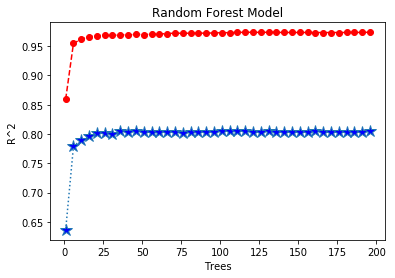

In [31]:
# plt.plot(x_trainer, y_trainer,color='black')
# plt.plot(x_tester, y_tester, color='green')

plt.plot(x_trainer, y_trainer, linestyle='--', marker='o', color='red', label="Training")
plt.plot(x_tester, y_tester, linestyle=':', marker='*', label="Testing",
     markerfacecolor='blue', markersize=12)
plt.ylabel("R^2")
plt.xlabel("Trees")
plt.title("Random Forest Model")
plt.show()